In [1]:
from gaia_tools import query
import matplotlib
#matplotlib.use("AGG")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.table import Table
import pyexcel
from astropy import units as u
from astropy.coordinates import SkyCoord

import sklearn
from sklearn import cluster
from astropy import units as u
from astropy.coordinates import SkyCoord
from matplotlib.patches import Circle
#from matplotlib import patches

%pylab inline

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
Populating the interactive namespace from numpy and matplotlib


In [7]:
# csv-pd set up for DBSCANN

GlobClust_Log_ra_dec = pd.read_csv('~/GlobClust_ra-dec.csv')
GlobClust_Log_r_t = GlobClust_Log_ra_dec.loc[0:7,"r_t"]
GlobClust_Log_radec = GlobClust_Log_ra_dec.loc[0:7,"RA":"DEC"]
GlobClust_Log_ID = GlobClust_Log_ra_dec.loc[0:7,"ID"]
#GlobClust_Log_dec = GlobClust_Log_ra_dec.loc[:,"dec"]
#GlobClust_Log_RA = GlobClust_Log_ra_dec.loc[0:7,"RA"]
#GlobClust_Log_DEC = GlobClust_Log_ra_dec.loc[0:7,"DEC"]
print(GlobClust_Log_r_t)

GlobClust_Log_2 = pd.read_csv('~/out_NGC 288_full_4-rt_ra_dec.csv')
GlobClust_Log_pmra = GlobClust_Log_2.loc[:,"pmra"]
GlobClust_Log_pmdec = GlobClust_Log_2.loc[:,"pmdec"]
GlobClust_Log_ra = GlobClust_Log_2.loc[:,"ra"]
GlobClust_Log_dec = GlobClust_Log_2.loc[:,"dec"]
GlobClust_Log_pmra = GlobClust_Log_pmra.as_matrix()
GlobClust_Log_pmdec = GlobClust_Log_pmdec.as_matrix()
GlobClust_Log_ra = GlobClust_Log_ra.as_matrix()
GlobClust_Log_dec = GlobClust_Log_dec.as_matrix()

0    13.192702
1     7.582903
2    42.296312
3     5.173850
4     4.777286
5     4.513344
6     4.657483
7     6.519924
Name: r_t, dtype: float64


In [4]:
GlobClust_Log_ra_dec.loc[0:7,"ID":"DEC"]

,ID,r_h,r_t,r_c,RA,DEC
0,NGC 288,2.23,13.192702,1.35,0h52m45.24s,-26d34m57.4s
1,Pal 5,2.73,7.582903,2.29,15h16m5.25s,0d6m41.8s
2,NGC 104,3.17,42.296312,0.36,0h24m5.67s,-72d4m52.6s
3,Pal 14,1.22,5.173850,0.82,16h11m0.6s,14d57m28s
4,Pal 15,1.10,4.777286,1.20,16h59m51s,0d32m20s
5,NGC 7492,1.15,4.513344,0.86,23h8m26.63s,-15d36m41.4s
6,NGC 5694,0.40,4.657483,0.06,14h39m36.29s,-26d32m20.2s
7,NGC 1851,0.51,6.519924,0.09,5h14m6.76s,-40d2m47.6s


In [14]:
SkyCoord(GlobClust_Log_radec.loc[2,"RA"], GlobClust_Log_radec.loc[2,"DEC"], frame='icrs')

<SkyCoord (ICRS): (ra, dec) in deg
    ( 6.023625, -72.08127778)>

<SkyCoord (ICRS): (ra, dec) in deg
    [(  13.1885    , -26.58261111), ( 229.021875  ,   0.11161111),
     (   6.023625  , -72.08127778), ( 242.7525    ,  14.95777778),
     ( 254.9625    ,   0.53888889), ( 347.11095833, -15.6115    ),
     ( 219.90120833, -26.53894444), (  78.52816667, -40.04655556)]>
[0] :  NGC 104 0.36 0.006 4500 <SkyCoord (ICRS): (ra, dec) in deg
    ( 6.023625, -72.08127778)>


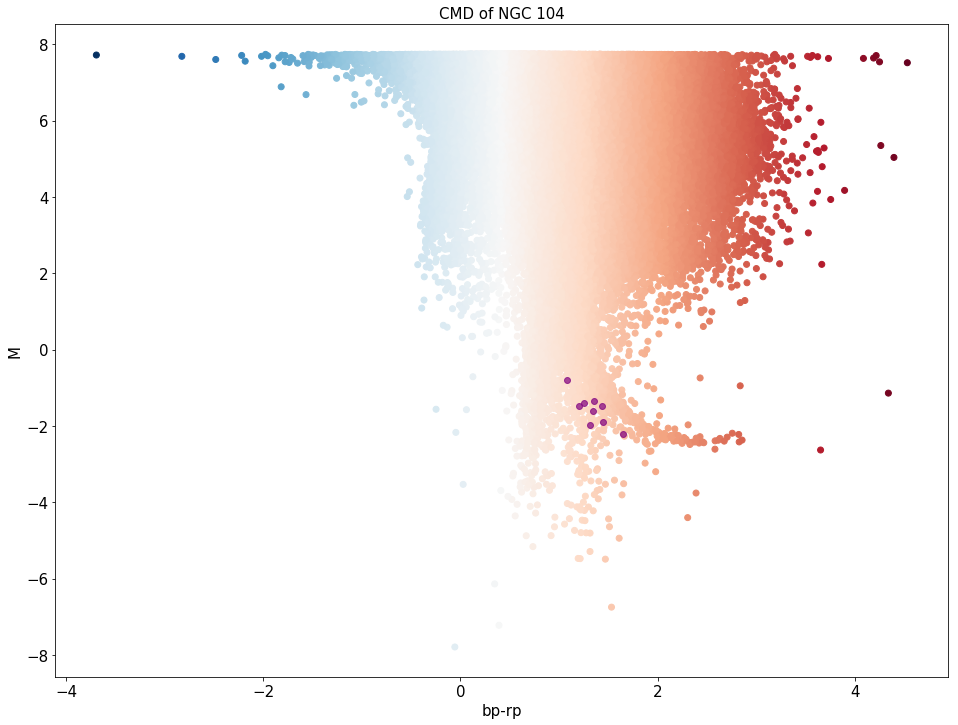

[1] :  NGC 5694 0.06 0.001 35000 <SkyCoord (ICRS): (ra, dec) in deg
    ( 219.90120833, -26.53894444)>


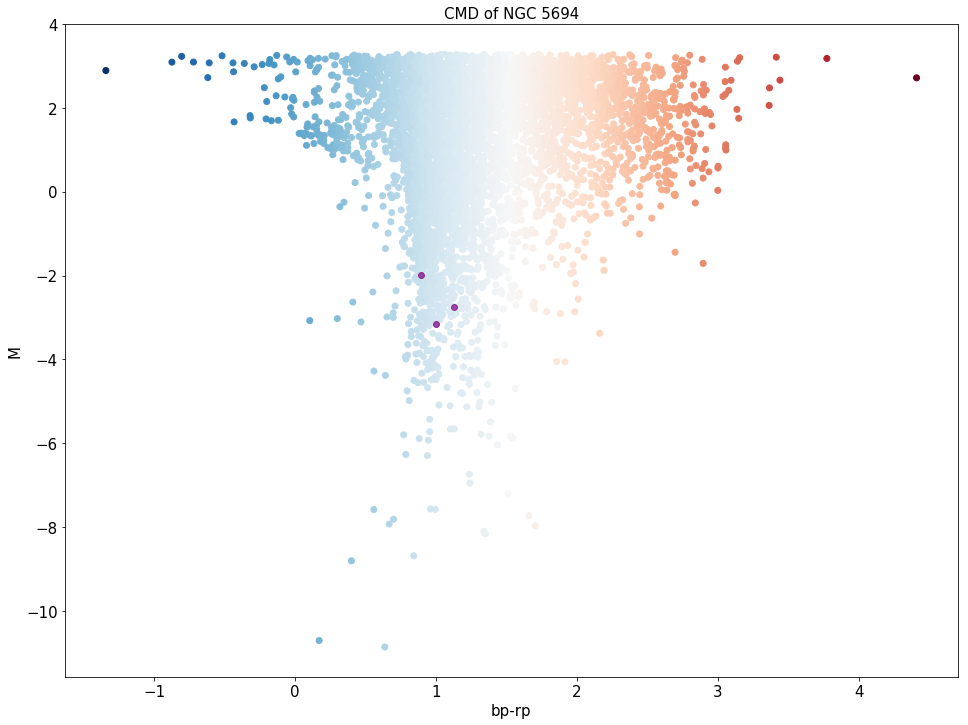

[2] :  NGC 1851 0.09 0.0015 45100 <SkyCoord (ICRS): (ra, dec) in deg
    ( 78.52816667, -40.04655556)>


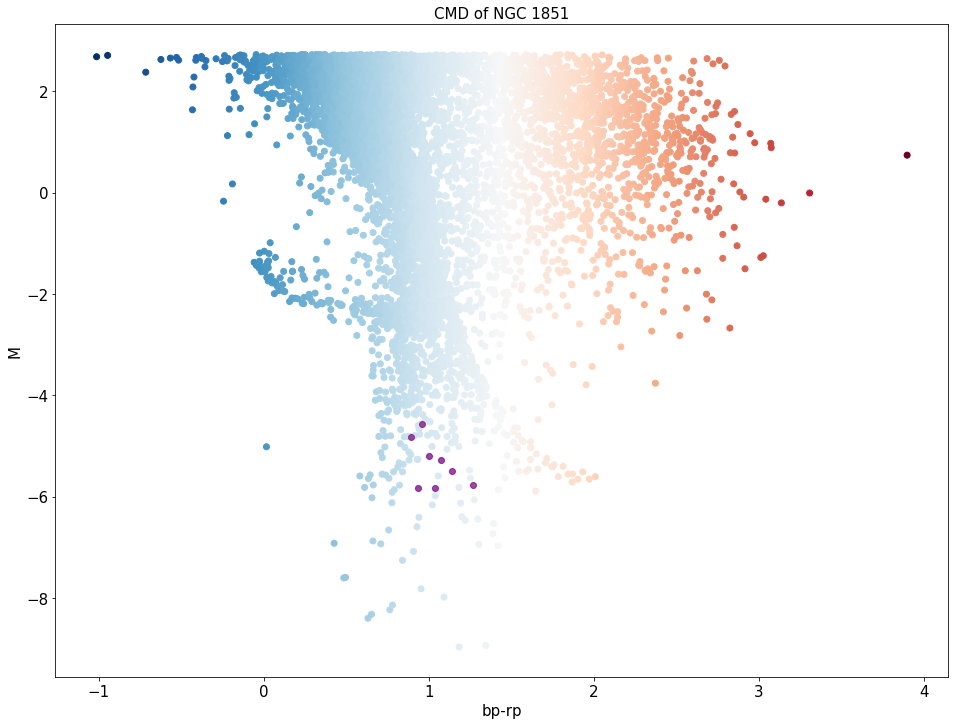

[3] :  NGC 7492 0.86 0.0143333333333 12100 <SkyCoord (ICRS): (ra, dec) in deg
    ( 347.11095833, -15.6115)>


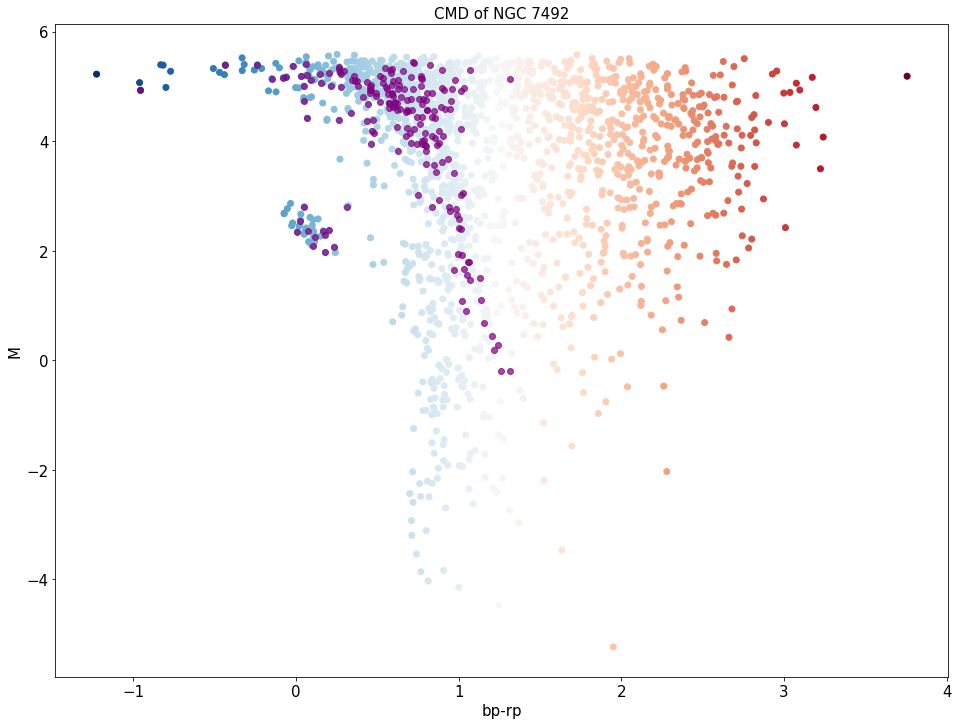

[4] :  Pal 5 2.29 0.0381666666667 26300 <SkyCoord (ICRS): (ra, dec) in deg
    ( 229.021875,  0.11161111)>


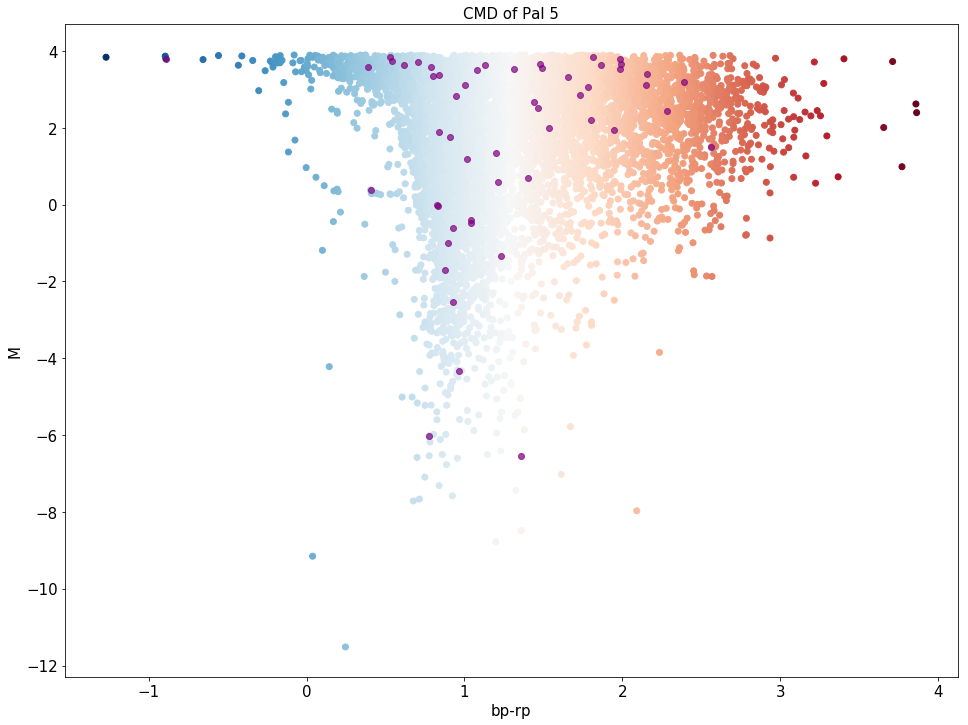

[5] :  NGC 288 1.35 0.0225 8900 <SkyCoord (ICRS): (ra, dec) in deg
    ( 13.1885, -26.58261111)>


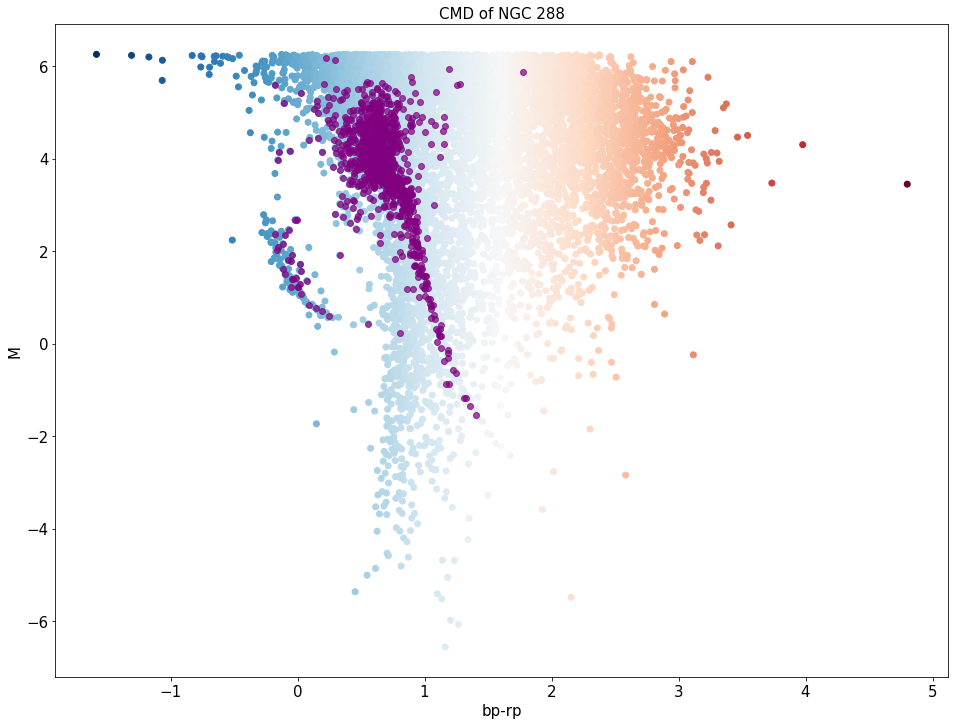

In [15]:
# Plotting core stars CMD on full CMD set (not considering parallax)
# RUN FOR DBSCAN !

#from gaia_tools import query
#import matplotlib
#matplotlib.use("AGG")
#import matplotlib.pyplot as plt
#import numpy as np
#import pandas as pd
#from astropy.table import Table
#import pyexcel
#from astropy import units as u
#from astropy.coordinates import SkyCoord

GlobClust_Log_ra_dec = pd.read_csv('~/GlobClust_ra-dec.csv')
#GlobClust_Log_r_h = GlobClust_Log_ra_dec.loc[:,"r_h"]
#Clust_Edge = GlobClust_Log_r_h
GlobClust_Log_r_c = GlobClust_Log_ra_dec.loc[:,"r_c"]
GlobClust_Log_r_t = GlobClust_Log_ra_dec.loc[:,"r_t"]

coord_ra_dec_deg=[]
coord_ra_dec = SkyCoord(GlobClust_Log_radec.loc[:,"RA"], GlobClust_Log_radec.loc[:,"DEC"], frame='icrs')
print(coord_ra_dec)

out_logs = ['out_NGC 104_full_4-rt_ra_dec.csv','out_NGC 5694_full_4-rt_ra_dec.csv',\
            'out_NGC 1851_full_4-rt_ra_dec.csv','out_NGC 7492_full_4-rt_ra_dec.csv','out_Pal 5_full_4-rt_ra_dec.csv',\
            'out_NGC 288_full_4-rt_ra_dec.csv']
GC_IDs = ['NGC 104', 'NGC 5694', 'NGC 1851', 'NGC 7492', 'Pal 5', 'NGC 288']
Clust_Edge = [GlobClust_Log_r_c[2], GlobClust_Log_r_c[6], GlobClust_Log_r_c[7], GlobClust_Log_r_c[5], GlobClust_Log_r_c[1], GlobClust_Log_r_c[0]] #[0.4, 0.03, 0.1, 0.05, 0.13, 0.2]
coords = [coord_ra_dec[2], coord_ra_dec[6], coord_ra_dec[7], coord_ra_dec[5], coord_ra_dec[1], coord_ra_dec[0]]

d_kpc = [4500, 35000, 45100, 12100, 26300, 8900]
d_pc = d_kpc

for i in range(0,len(coords)):#len(GC_IDs)): #Should be better
    print([i], ": ", GC_IDs[i], Clust_Edge[i], Clust_Edge[i]/60, d_pc[i], coords[i])
    GlobClust_Log_CMD = pd.read_csv(out_logs[i]) 
    GlobClust_Log_g = GlobClust_Log_CMD.loc[:,"phot_g_mean_mag"]
    GlobClust_Log_rp = GlobClust_Log_CMD.loc[:,"phot_rp_mean_mag"]
    GlobClust_Log_bp = GlobClust_Log_CMD.loc[:,"phot_bp_mean_mag"]
    GlobClust_Log_rpbp = GlobClust_Log_bp - GlobClust_Log_rp
    GlobClust_Log_ra_out = GlobClust_Log_CMD.loc[:,"ra"]
    GlobClust_Log_dec_out = GlobClust_Log_CMD.loc[:,"dec"]
    GlobClust_Log_pmdec_out = GlobClust_Log_CMD.loc[:,"pmdec"]
    GlobClust_Log_pmra_out = GlobClust_Log_CMD.loc[:,"pmra"]
    
    
    #M=m-5(log(d)-1)
    GlobClust_Log_M = GlobClust_Log_g-5*((log10(d_pc[i])) - 1)
    
    indx = (sqrt((np.fabs(GlobClust_Log_ra_out-coords[i].ra.deg)**2+np.fabs(GlobClust_Log_dec_out-coords[i].dec.deg)**2))<Clust_Edge[i]/60)
    #print(coord_ra_dec.ra.deg[2],coord_ra_dec.dec.deg[2])
    #(np.fabs(GlobClust_Log_ra_out-GlobClust_Log_ra_out.mean())<Clust_Edge[i]/60)*\
    #(np.fabs(GlobClust_Log_dec_out-GlobClust_Log_dec_out.mean())<Clust_Edge[i]/60)  #have used 1.1 & 0.35 for NGC 288
    
    fig=plt.figure(figsize=(16,12))
    plt.scatter(x=GlobClust_Log_rpbp, y=GlobClust_Log_M, c=GlobClust_Log_rpbp, cmap='RdBu_r')
    plt.scatter(x=GlobClust_Log_rpbp[indx], y=GlobClust_Log_M[indx], c='purple', alpha=0.7) #core stars
    plt.xlabel('bp-rp', fontsize=15)
    plt.ylabel('M', fontsize=15)
    plt.title('CMD of ' + GC_IDs[i], fontsize=15)
    #cb=plt.colorbar()
    #cb.ax.tick_params(labelsize=15)
    #cb.set_label(r'$\mathrm{pmdec}$',fontsize=15)
    plt.gca().tick_params(labelsize=15)
    plt.show()

    #CMD_raw = {'bprp': GlobClust_Log_rpbp, 'M': GlobClust_Log_M, 'ra': GlobClust_Log_ra_out, 'dec': GlobClust_Log_dec_out}
    #CMD_plot = pd.DataFrame(data=CMD_raw)
    #CMD_plot.to_csv('out_CMD_'+ GC_IDs[i] +'_rawplot.csv', index=True, header=True)
    
    #GC_StarsPlot = {'bprp indx': GlobClust_Log_rpbp[indx], 'M indx': GlobClust_Log_M[indx], 'ra': GlobClust_Log_ra_out,\
    #                'dec': GlobClust_Log_dec_out}
    #GC_StarscutPlot = pd.DataFrame(data=GC_StarsPlot)
    #GC_StarscutPlot.to_csv('out_GCStars_'+ GC_IDs[i] +'_cutplot_r_c.csv', index=True, header=True)
    


NameError: name 'ra_ic3' is not defined

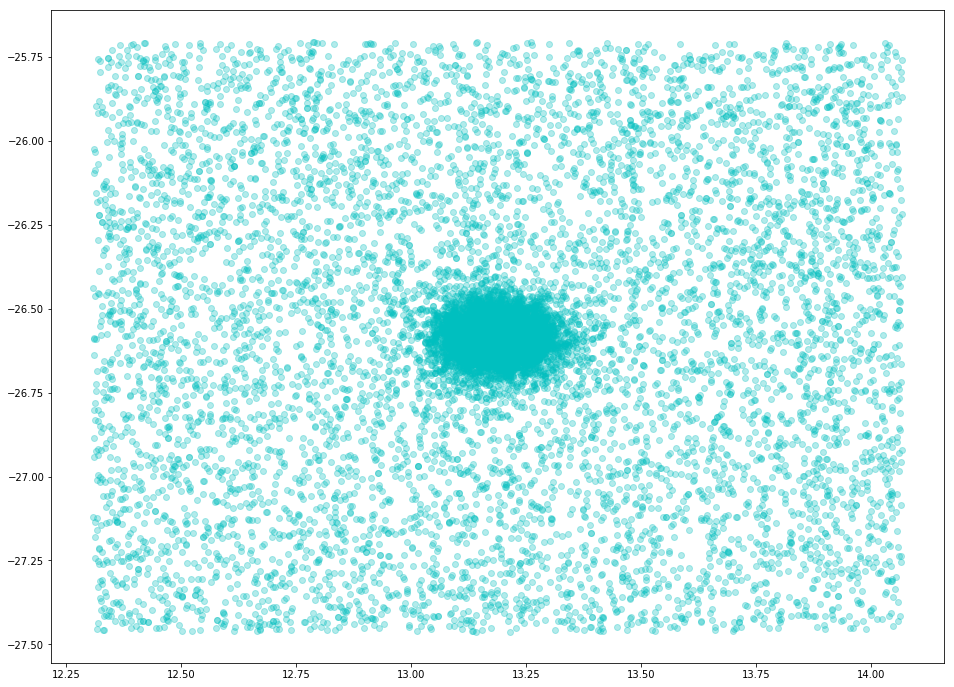

In [6]:
# Full Ra-Dec set overplotted with cleaned data of Cluster Stars  (Run after next 2 cells)

fig=plt.figure(figsize=(16,12))
indx2 = [not i for i in indx]
plt.scatter(x=GlobClust_Log_ra_out, y=GlobClust_Log_dec_out, c='c', alpha=0.3)
#plt.scatter(x=GlobClust_Log_ra_out[indx2], y=GlobClust_Log_dec_out[indx2], c='c', alpha=0.3)
#plt.scatter(x=rpbp_final2, y=M_final2, c='purple', alpha=0.7)
plt.scatter(x=ra_ic3, y=dec_ic3, c='purple')#, alpha=0.2)
plt.xlabel('ra', fontsize=15)
plt.ylabel('dec', fontsize=15)
#plt.gca().invert_yaxis()
#plt.title('CMD of ' + GC_IDs[i], fontsize=15)
#cb=plt.colorbar()
#cb.ax.tick_params(labelsize=15)
#cb.set_label(r'$\mathrm{pmdec}$',fontsize=15)
plt.gca().tick_params(labelsize=15)
plt.show()

In [37]:
Clust_Edge

array([ 1.35])

In [ ]:
# DBSCANN

coord_ra_dec_deg=[]
coord_ra_dec = SkyCoord(GlobClust_Log_radec.loc[:,"RA"], GlobClust_Log_radec.loc[:,"DEC"], frame='icrs')
print(coord_ra_dec)

DB_Params =[]
DB_Params=np.transpose(DB_Params)

GlobClust_Log_parallax_out = GlobClust_Log_2.loc[:,"parallax"]
GlobClust_Log_parallaxerror_out = GlobClust_Log_2.loc[:,"parallax_error"]
GlobClust_Log_parallaxe_out = GlobClust_Log_2.loc[:,"parallax":"parallax_error"]

GlobClust_Log_parallaxover_out = GlobClust_Log_parallaxerror_out/GlobClust_Log_parallax_out

#parallax_indx = (GC_parallaxover>0.20) | ((1/GC_parallax>5.)*(GC_parallaxover<0.20))
parallax_indx2=((1/GlobClust_Log_parallax_out<5.)*(GlobClust_Log_parallaxover_out<0.10))
parallax_indx2=[not i for i in parallax_indx2]

#DF={'M': GlobClust_Log_M[indx]/5, 'rpbp': GlobClust_Log_rpbp[indx]/2.5, 'pmra': GlobClust_Log_pmra[indx]/20, \
#    'pmdec': GlobClust_Log_pmdec[indx]/20}#, 'ra': GlobClust_Log_ra[indx]/0.35, 'dec': GlobClust_Log_dec[indx]/0.3}

DF={'M': GlobClust_Log_M[parallax_indx2]/5, 'rpbp': GlobClust_Log_rpbp[parallax_indx2]/2.5, \
    'pmra': GlobClust_Log_pmra[parallax_indx2]/20, \
    'pmdec': GlobClust_Log_pmdec[parallax_indx2]/20}#, 'ra': GlobClust_Log_ra[indx]/0.35, 'dec': GlobClust_Log_dec[indx]/0.3}

DB_Params = pd.DataFrame(data=DF)
DB_Params=DB_Params.dropna()

print(shape(DB_Params))

db=sklearn.cluster.DBSCAN(eps=0.1625/4, min_samples=8, metric='euclidean', metric_params=None, algorithm='auto', 
                      leaf_size=30, p=None, n_jobs=1).fit(DB_Params)

print(db.labels_)
print(shape(db.labels_))

fig=plt.figure(figsize=(18,12))
plt.scatter(GlobClust_Log_rpbp/2.5, GlobClust_Log_M/5, c=GlobClust_Log_rpbp/2.5, cmap='RdBu_r')
#plt.scatter(db,DB_Params)
#plt.show()

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of Subgroups: %d' % n_clusters_)

x_param3=[]
y_param3=[]

x_param4=[]
y_param4=[]

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    
    #NOISE
    #xy = DB_Params[class_member_mask & ~core_samples_mask]
    #plt.plot(xy.loc[:, "rpbp"], xy.loc[:, "M"], 'o', markerfacecolor=tuple(col),
    #         markeredgecolor='k', markersize=6)
    
    #CLEANED DATA
    xy = DB_Params[class_member_mask & core_samples_mask]
    
    plt.plot(xy.loc[:, "rpbp"], xy.loc[:, "M"], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    
    x_param3.append(xy.loc[:, "rpbp"]*2.5)
    y_param3.append(xy.loc[:, "M"]*5)
    
    #x_param4.append(xy.loc[:, "ra"]*0.35)
    #y_param4.append(xy.loc[:, "dec"]*0.3)


plt.gca().invert_yaxis()
plt.title('Estimated number of Subgroups: %d' % n_clusters_)
#cb=plt.colorbar()
#cb.ax.tick_params(labelsize=15)
plt.xlabel('bp-rp', fontsize=15)
plt.ylabel('M', fontsize=15)

plt.legend()
plt.show()
#fig.savefig('GC_DBSCAN'+ GlobClust_Log_ID[0] +'eps0p165-mins10_coreCMD-fullsetiponfullcmd.png')